In [29]:
# Necessary Imports
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

#ignoring some deprication warnings
import warnings
warnings.filterwarnings('ignore')

# ML WORKFLOW STEP 1: DATA INPUT
data = pd.read_csv('diabetes.csv') # download the csv file provided and make sure it is in the same directory you're running the code
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
# ML WORKFLOW STEP 2: DATA PROCESSING
print("\nMissing values per column:")
print(data.isnull().sum())
data.info()

''' We have no missing values which is good, but, some columns have zero values that don't make sense medically.
    For example, a BMI or blood pressure of 0 isn't realistic, so these are going to be treated as missing values.
'''
# Substitue all inappropriate Zero values with NANs and then fill in the
data[['Glucose', 'BMI', 'SkinThickness', 'BloodPressure']] = data[['Glucose', 'BMI', 'SkinThickness', 'BloodPressure']].replace(to_replace= 0, value= np.nan)  #chat corrected double brackets and reassignment
data = data.fillna(method='ffill', axis = 0)

data.head()



Missing values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1


In [33]:
# ML WORKFLOW STEP 3: MACHINE LEARNING MODEL
# 3.1 Feature matrix and target vector
X = data.drop('Outcome', axis=1)
y = data['Outcome']


results = pd.DataFrame()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# scale features for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 3.2, 3.3, 3.4, 3.5 Choose, Instantiate, Fit and Predict with Classification Models

# -----------------------------------

# Model 1: Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

# Cross-validation
results_log = cross_validate(log_model, X_train, y_train, cv=5, scoring='accuracy',return_train_score=True)

#prediction
log_pred = log_model.predict(X_val_scaled)

# -----------------------------------

# Model 2: Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_params = {'max_depth': [3, 5, 7, 9,11]}
dt_grid = GridSearchCV(dt_model, dt_params, cv=5)
dt_grid.fit(X_train, y_train)

dt_best = dt_grid.best_estimator_
results_dt= cross_validate(dt_best, X_train, y_train, cv=5, scoring='accuracy',return_train_score=True)
dt_pred = dt_best.predict(X_val)
# -----------------------------------

# Model 3: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [50, 100], 'max_depth': [5, 10, None], 'min_samples_split': [2, 5]}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5)
rf_grid.fit(X_train, y_train)

rf_best = rf_grid.best_estimator_
results_rf = cross_validate(rf_best, X_train, y_train, cv=5, scoring='accuracy',return_train_score=True)
rf_pred = rf_best.predict(X_val)
# -----------------------------------

print("All 3 models succesfully instantiated, fitted and used to predict")

All 3 models succesfully instantiated, fitted and used to predict



=== Training and Validation Accuracies ===
                     validation accuracy  training accuracy
Logistic Regression             0.776916           0.790721
Decision Tree                   0.737878           0.780539
Random Forest                   0.776929           0.858715
-----------------------------

=== Logistic Regression ===
Accuracy: 0.7272727272727273
Precision: 0.6363636363636364
Recall: 0.5185185185185185


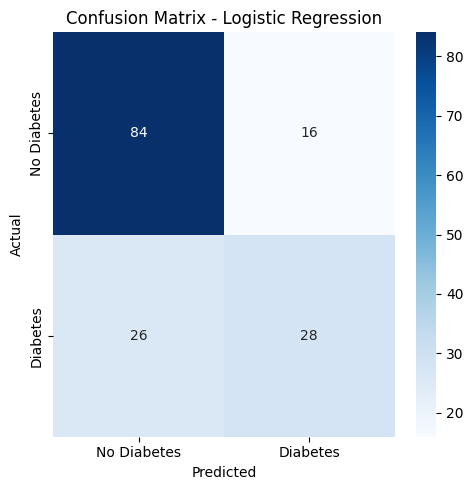


=== Decision Tree ===
Best Parameters: {'max_depth': 3}
Accuracy: 0.6948051948051948
Precision: 0.6666666666666666
Recall: 0.25925925925925924


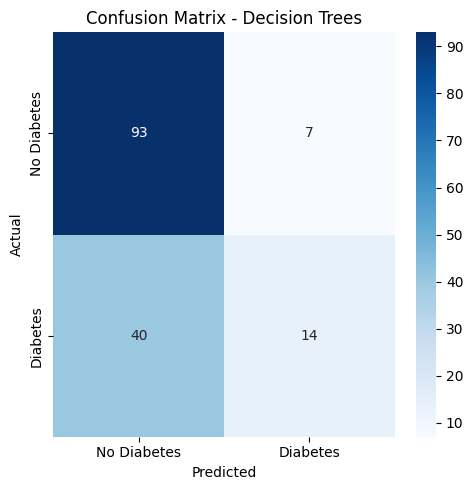


=== Random Forest ===
Best Parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.7467532467532467
Precision: 0.6744186046511628
Recall: 0.5370370370370371


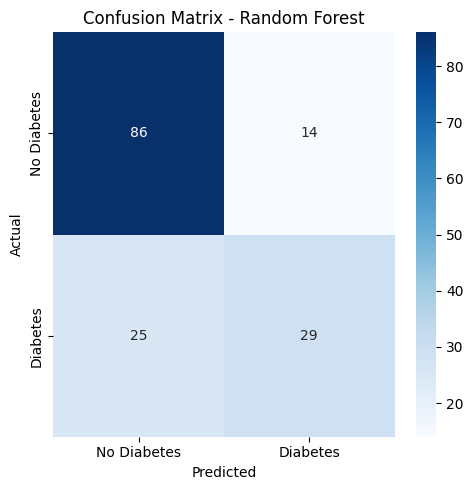

In [34]:
# ML WORKFLOW STEP 4: VALIDATION
from sklearn.metrics import ConfusionMatrixDisplay

print("\n=== Training and Validation Accuracies ===")
results['validation accuracy']= [results_log['test_score'].mean(),results_dt['test_score'].mean(), results_rf['test_score'].mean()]
results['training accuracy'] = [results_log['train_score'].mean(),results_dt['train_score'].mean(), results_rf['train_score'].mean()]
results.index = ['Logistic Regression', 'Decision Tree', 'Random Forest']
print(results)
print('-----------------------------')


print("\n=== Logistic Regression ===")

print("Accuracy:", accuracy_score(y_val, log_pred))
print("Precision:", precision_score(y_val, log_pred))
print("Recall:", recall_score(y_val, log_pred))


# Confusion Matrix - Logistic Regression
cm = confusion_matrix(y_val, log_pred)
fig, axes = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, xticklabels=['No Diabetes', 'Diabetes'],  yticklabels=['No Diabetes', 'Diabetes'],  annot=True, fmt='d', cmap='Blues', ax=axes)
axes.set_title('Confusion Matrix - Logistic Regression')
axes.set_xlabel('Predicted')
axes.set_ylabel('Actual')
plt.tight_layout()
plt.show()



print("\n=== Decision Tree ===")
print("Best Parameters:", dt_grid.best_params_)
print("Accuracy:", accuracy_score(y_val, dt_pred))
print("Precision:", precision_score(y_val, dt_pred))
print("Recall:", recall_score(y_val, dt_pred))

# Confusion Matrix - Decision Trees
cm = confusion_matrix(y_val, dt_pred)
fig, axes = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, xticklabels=['No Diabetes', 'Diabetes'],  yticklabels=['No Diabetes', 'Diabetes'],  annot=True, fmt='d', cmap='Blues', ax=axes)
axes.set_title('Confusion Matrix - Decision Trees')
axes.set_xlabel('Predicted')
axes.set_ylabel('Actual')
plt.tight_layout()
plt.show()


print("\n=== Random Forest ===")
print("Best Parameters:", rf_grid.best_params_)
print("Accuracy:", accuracy_score(y_val, rf_pred))
print("Precision:", precision_score(y_val, rf_pred))
print("Recall:", recall_score(y_val, rf_pred))

# Confusion Matrix - Random Forest
cm = confusion_matrix(y_val, rf_pred)
fig, axes = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, xticklabels=['No Diabetes', 'Diabetes'],  yticklabels=['No Diabetes', 'Diabetes'],  annot=True, fmt='d', cmap='Blues', ax=axes)
axes.set_title('Confusion Matrix - Random Forest')
axes.set_xlabel('Predicted')
axes.set_ylabel('Actual')
plt.tight_layout()
plt.show()



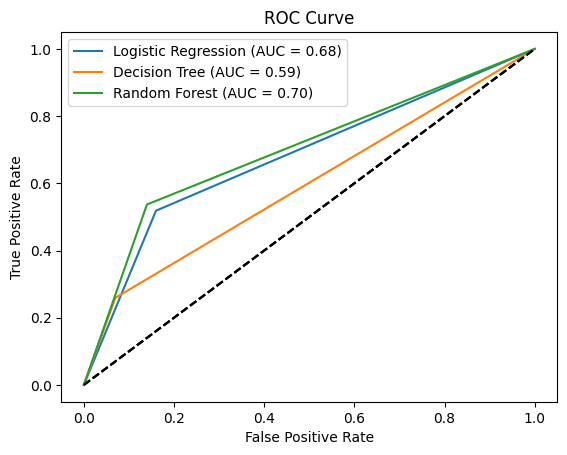

In [25]:
# ML WORKFLOW STEP 5: VISUALIZATION
from sklearn.metrics import roc_curve, auc

def plot_roc(model_name, y_true, y_proba):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

plt.figure()
plot_roc("Logistic Regression", y_val, log_pred)
plot_roc("Decision Tree", y_val, dt_pred)
plot_roc("Random Forest", y_val, rf_pred)
plt.show()
